# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.156  1  0.278 0.599 0.001   
                             age        0.020  1  0.036 0.850 0.000   
                             Kiel       1.572  1  2.797 0.096 0.014   
                             Magdeburg  5.043  1  8.973 0.003 0.045   
                             Sweden     7.565  1 13.460 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.010  1  0.011 0.916 0.000   
                             age        0.474  1  0.533 0.466 0.003   
                             Kiel       0.003  1  0.003 0.955 0.000   
                             Magdeburg  1.254  1  1.409 0.237 0.007   
                             Sweden    18.492  1 20.779 0.000 0.098   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.223  0.734    False  
                             age               0.071  0.914    False  
                             Kiel              1.017  0.202    False  
                             Magdeburg         2.508  0.013     True  
                             Sweden            3.500  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.038  0.953    False  
                             age               0.331  0.622    False  
                             Kiel              0.020  0.972    False  
                             Magdeburg         0.626  0.392    False  
                             Sweden            5.037  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.183  1  7.962 0.005 0.040   
                             age        0.015  1  0.098 0.754 0.001   
                             Kiel       0.356  1  2.398 0.123 0.012   
                             Magdeburg  0.535  1  3.601 0.059 0.019   
                             Sweden     1.913  1 12.878 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.293  1  2.650 0.105 0.014   
                             age        0.705  1  1.446 0.231 0.008   
                             Kiel       1.446  1  2.964 0.087 0.015   
                             Magdeburg  1.193  1  2.446 0.120 0.013   
                             Sweden    19.291  1 39.551 0.000 0.172   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.277  0.016     True  
                             age               0.122  0.833    False  
                             Kiel              0.910  0.218    False  
                             Magdeburg         1.227  0.121    False  
                             Sweden            3.374  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.978  0.193    False  
                             age               0.637  0.354    False  
                             Kiel              1.062  0.165    False  
                             Magdeburg         0.923  0.213    False  
                             Sweden            8.672  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.277  0.016     True   
                             Kiel      0.123         0.910  0.218    False   
                             Magdeburg 0.059         1.227  0.121    False   
                             Sweden    0.000         3.374  0.002     True   
                             age       0.754         0.122  0.833    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.105         0.978  0.193    False   
                             Kiel      0.087         1.062  0.165    False   
                             Magdeburg 0.120         0.923  0.213    False   
                             Sweden    0.000         8.672  0.000     True   
                             age       0.231         0.637  0.354    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.599         0.223  0.734    False  
                             Kiel      0.096         1.017  0.202    False  
                             Magdeburg 0.003         2.508  0.013     True  
                             Sweden    0.000         3.500  0.002     True  
                             age       0.850         0.071  0.914    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.916         0.038  0.953    False  
                             Kiel      0.955         0.020  0.972    False  
                             Magdeburg 0.237         0.626  0.392    False  
                             Sweden    0.000         5.037  0.000     True  
                             age       0.466         0.331  0.622    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.228         3.205     0.283     0.261         2.477     0.338
std       0.295         6.070     0.321     0.304         5.319     0.332
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.001         0.400     0.003     0.004         0.331     0.015
50%       0.067         1.176     0.133     0.121         0.918     0.242
75%       0.399         3.188     0.531     0.467         2.428     0.623
max       1.000        86.185     1.000     0.999       149.340     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49551/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.277   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.516   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.234         0.631   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.246         0.610   
A0A075B6H7                                         AD     0.001         3.136   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.226         0.645   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.599         0.222   
S4R3U6                                             AD     0.105         0.978   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.358    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.370    False   
A0A075B6H7                                         AD      0.003     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.286    False   
Q9Y6X5                                             AD      0.349    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.160    False   
Q9Y6Y9                                             AD      0.712    False   
S4R3U6                                             AD      0.193    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.599         0.223   
A0A024R0T9;K7ER74;P02655                           AD     0.047         1.327   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.078         1.107   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.473         0.325   
A0A075B6H7                                         AD     0.165         0.782   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.021         1.674   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.211         0.676   
S4R3U6                                             AD     0.916         0.038   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.734    False  
A0A024R0T9;K7ER74;P02655                           AD      0.116    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.172    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.628    False  
A0A075B6H7                                         AD      0.303    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.242         1.571     0.304     0.250         1.402     0.333
std       0.293         1.827     0.316     0.289         1.604     0.315
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.007         0.373     0.020     0.012         0.364     0.038
50%       0.093         1.031     0.174     0.121         0.918     0.242
75%       0.424         2.154     0.556     0.432         1.931     0.593
max       0.999        21.319     0.999     0.999        20.524     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,959,1030


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.277  0.016   
A0A024R0T9;K7ER74;P02655                           0.030         1.516  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.234         0.631  0.358   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.246         0.610  0.370   
A0A075B6H7                                         0.001         3.136  0.003   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.286   
Q9Y6X5                                             0.226         0.645  0.349   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.160   
Q9Y6Y9                                             0.599         0.222  0.712   
S4R3U6                                             0.105         0.978  0.193   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.599   
A0A024R0T9;K7ER74;P02655                              False 0.047   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.078   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.473   
A0A075B6H7                                             True 0.165   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.021   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.211   
S4R3U6                                                False 0.916   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.223  0.734   
A0A024R0T9;K7ER74;P02655                                   1.327  0.116   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.107  0.172   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.325  0.628   
A0A075B6H7                                                 0.782  0.303   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.674  0.062   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.676  0.361   
S4R3U6                                                     0.038  0.953   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    896
CF (yes) - PI (yes)   328
CF (yes) - PI (no)    134
CF (no)  - PI (yes)    63
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49551/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.277  0.016     True 0.599   
A0A075B6H7                   0.001         3.136  0.003     True 0.165   
A0A075B6I0                   0.001         3.244  0.002     True 0.020   
A0A075B6J9                   0.007         2.146  0.020     True 0.105   
A0A075B6R2                   0.001         2.901  0.005     True 0.593   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.043         1.371  0.092    False 0.007   
Q9UKB5                       0.149         0.826  0.252    False 0.011   
Q9UNW1                       0.360         0.444  0.492    False 0.009   
Q9UP79                       0.000         4.396  0.000     True 0.369   
Q9UQ52                       0.000         3.682  0.001     True 0.072   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.223  0.734    False       186  
A0A075B6H7                           0.782  0.303    False        91  
A0A075B6I0                           1.707  0.058    False       194  
A0A075B6J9                           0.980  0.217    False       156  
A0A075B6R2                           0.227  0.730    False       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               2.145  0.026     True       169  
Q9UKB5                               1.969  0.036     True       148  
Q9UNW1                               2.026  0.032     True       171  
Q9UP79                               0.432  0.532    False       135  
Q9UQ52                               1.146  0.161    False       188  

[197 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.016,0.734,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.116,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.358,0.172,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.370,0.628,196,CF (no) - PI (no)
A0A075B6H7,0.003,0.303,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.286,0.317,197,CF (no) - PI (no)
Q9Y6X5,0.349,0.062,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.160,0.181,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P01743,0.035,0.999,113,CF (yes) - PI (no),0.964
P17931,0.039,0.976,174,CF (yes) - PI (no),0.937
P42262;P42262-2;P42262-3,0.006,0.899,87,CF (yes) - PI (no),0.893
P48745,0.010,0.899,180,CF (yes) - PI (no),0.889
Q9BX67,0.913,0.026,161,CF (no) - PI (yes),0.886
...,...,...,...,...,...
A0A0J9YXX1,0.048,0.058,197,CF (yes) - PI (no),0.010
F5GY80;F5H7G1;P07358,0.048,0.057,197,CF (yes) - PI (no),0.009
Q9NX62,0.046,0.055,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


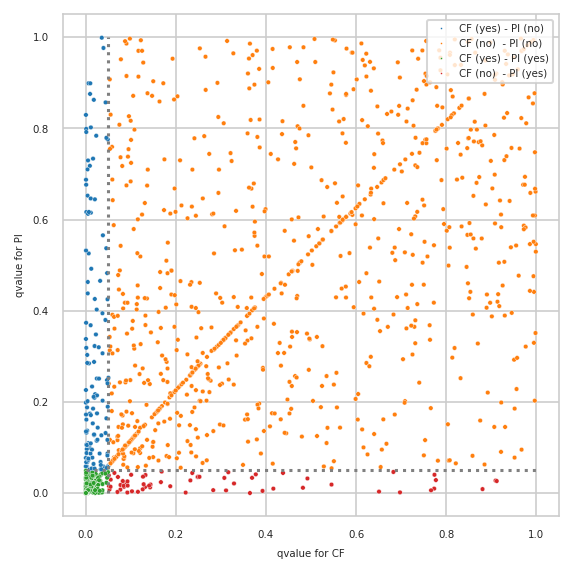

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


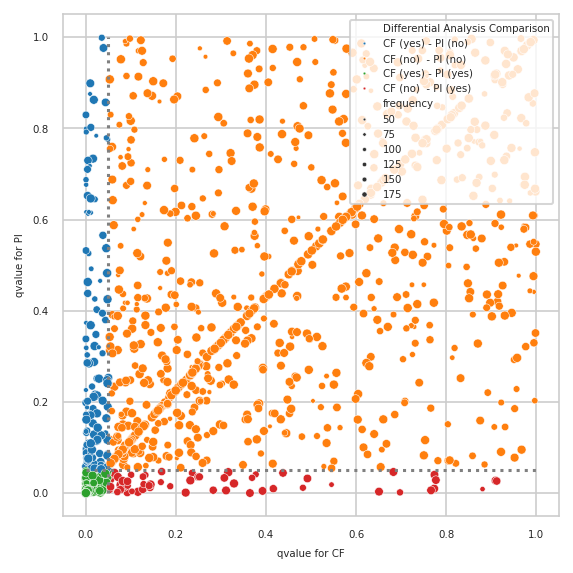

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out